# LIDAR Sensor Model

Import necessary libraries.

In [1]:
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data
### Samples from real turtlebot LIDAR
Load data from real turtlebot into a pandas DataFrame.

In [2]:
MAX_RANGE = 16.0
TOTAL_POSITIONS = 6
data_files = ["mea_"+str(i)+".txt" for i in np.arange(1, TOTAL_POSITIONS+1)]
cols = ['lidar'+str(i) for i in range(360)]
data = pd.DataFrame(columns = cols+["pos"])
for i, file in enumerate(data_files, 1):
    stream = open(file, "r")
    docs = yaml.load_all(stream)
    file_data = pd.DataFrame(columns = cols)
    for doc in docs:
        if doc is not None:
            for k, v in doc.items():
                if k == 'ranges':
                    data_line = pd.DataFrame(columns = cols, data = [v], dtype=np.float)
                    file_data = file_data.append(data_line, ignore_index = True)
    file_data["pos"] = i
    data = data.append(file_data, ignore_index = True)
data = data.replace(np.inf, MAX_RANGE)
data[data>MAX_RANGE] = MAX_RANGE
print(data.shape)
data.head()

E:\Program_Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: YAMLLoadWarning: calling yaml.load_all() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # Remove the CWD from sys.path while we load stuff.


(565, 361)


,lidar0,lidar1,lidar2,lidar3,lidar4,lidar5,lidar6,lidar7,lidar8,lidar9,...,lidar351,lidar352,lidar353,lidar354,lidar355,lidar356,lidar357,lidar358,lidar359,pos
0,3.7490,2.66950,3.74000,3.31125,3.02250,2.73900,2.49850,2.50225,2.50850,2.50575,...,3.74150,3.73525,3.73525,3.74550,3.74000,3.73875,3.73650,3.74550,3.65625,1
1,3.7470,3.73925,3.73800,3.34500,2.99675,2.76375,2.49900,2.50175,2.50475,2.50375,...,3.74075,3.74075,3.73450,3.74275,3.74000,3.73725,3.73650,3.77975,3.69900,1
2,3.7505,3.70375,3.69350,3.30850,2.97150,2.71600,2.50600,2.50025,2.50725,2.50850,...,3.73925,3.73925,3.73725,3.74350,3.73800,3.73375,3.73875,3.78400,3.69775,1
3,3.7470,2.67125,3.78825,3.57000,3.11550,2.60650,2.50050,2.50200,2.50425,2.50625,...,3.73025,3.73300,3.74150,3.77775,3.74475,3.73650,3.74150,3.78050,3.65550,1
4,3.7870,16.00000,3.83575,3.27550,2.96825,2.71450,2.50175,2.50000,2.50725,2.51300,...,3.77700,3.73925,3.73525,3.73925,3.74275,3.73925,3.74475,3.75325,3.74550,1


### Data from Stage simulator
Load simulation data from Stage Turtlebot into a pandas DataFrame.

In [3]:
data_files = ["result_pos"+str(i)+"_f.txt" for i in np.arange(1, TOTAL_POSITIONS+1)]
cols = ['lidar'+str(i) for i in range(360)]
gt_ = pd.DataFrame(columns = cols+["pos"])
for i, file in enumerate(data_files, 1):
    stream = open(file, "r")
    docs = yaml.load_all(stream)
    file_data = pd.DataFrame(columns = cols)
    for doc in docs:
        if doc is not None:
            for k, v in doc.items():
                if k == 'ranges':
                    data_line = pd.DataFrame(columns = cols, data = [v], dtype=np.float)
                    file_data = file_data.append(data_line, ignore_index = True)
    file_data["pos"] = i
    gt_ = gt_.append(file_data, ignore_index = True)
gt_ = gt_.replace(np.inf, MAX_RANGE)
gt_[gt_>MAX_RANGE] = MAX_RANGE
print(gt_.shape)
gt_.head()

E:\Program_Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: YAMLLoadWarning: calling yaml.load_all() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


(60, 361)


,lidar0,lidar1,lidar2,lidar3,lidar4,lidar5,lidar6,lidar7,lidar8,lidar9,...,lidar351,lidar352,lidar353,lidar354,lidar355,lidar356,lidar357,lidar358,lidar359,pos
0,3.55,3.550544,3.552176,3.554899,3.545198,3.563636,3.187559,2.851372,2.67619,2.683219,...,3.585084,3.57681,3.569664,3.563636,3.558717,3.554899,3.552176,3.550544,3.55,1
1,3.55,3.550544,3.552176,3.554899,3.545198,3.563636,3.187559,2.851372,2.67619,2.683219,...,3.585084,3.57681,3.569664,3.563636,3.558717,3.554899,3.552176,3.550544,3.55,1
2,3.55,3.550544,3.552176,3.554899,3.545198,3.563636,3.187559,2.851372,2.67619,2.683219,...,3.585084,3.57681,3.569664,3.563636,3.558717,3.554899,3.552176,3.550544,3.55,1
3,3.55,3.550544,3.552176,3.554899,3.545198,3.563636,3.187559,2.851372,2.67619,2.683219,...,3.585084,3.57681,3.569664,3.563636,3.558717,3.554899,3.552176,3.550544,3.55,1
4,3.55,3.550544,3.552176,3.554899,3.545198,3.563636,3.187559,2.851372,2.67619,2.683219,...,3.585084,3.57681,3.569664,3.563636,3.558717,3.554899,3.552176,3.550544,3.55,1


### Ground truth datasets
Average the simulation data for each position to use as ground truth dataset 1.

In [4]:
gt1 = pd.DataFrame(columns = cols)
for pos in gt_["pos"].unique():
    data_ = gt_[gt_['pos']==pos].replace(np.inf, MAX_RANGE)
    data_[data_ > MAX_RANGE] = MAX_RANGE
    gt1 = gt1.append(pd.DataFrame(data_.mean(axis=0)).T, ignore_index = True)
gt1 = gt1[cols+["pos"]]
gt1

E:\Program_Files\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,lidar0,lidar1,lidar2,lidar3,lidar4,lidar5,lidar6,lidar7,lidar8,lidar9,...,lidar351,lidar352,lidar353,lidar354,lidar355,lidar356,lidar357,lidar358,lidar359,pos
0,3.55,3.550544,3.552176,3.554899,3.545198,3.563636,3.187559,2.851372,2.676190,2.683219,...,3.585084,3.576810,3.569664,3.563636,3.558717,3.554899,3.552176,3.550544,3.55,1.0
1,4.05,4.050621,4.052483,4.055589,4.059945,3.623867,3.629996,3.637263,3.645677,3.655253,...,4.090025,4.080585,4.072433,4.065557,4.059945,4.055589,4.052483,4.050621,4.05,2.0
2,1.04,1.040159,1.040637,1.041435,1.042554,1.043995,1.045761,1.047854,1.050278,1.053037,...,1.050278,1.047854,1.045761,1.043995,1.042554,1.041435,1.040637,1.040159,1.04,3.0
3,1.95,1.950299,1.951195,1.952691,1.954788,1.957490,1.960801,1.964726,1.969272,1.974444,...,1.969272,1.964726,1.960801,1.957490,1.954788,1.952691,1.951195,1.950299,1.95,4.0
4,4.95,4.950758,4.953034,4.956831,4.962155,4.969014,4.977419,4.987382,4.998920,5.012050,...,4.998920,4.987382,4.977419,4.969014,4.962155,4.956831,4.953034,4.950758,4.95,5.0
5,0.10,0.100015,0.100061,0.100138,0.100246,0.100384,0.100554,0.100755,0.100988,0.101254,...,0.100988,0.100755,0.100554,0.100384,0.100246,0.100138,0.100061,0.100015,0.10,6.0


Take mode for each angle of real turtlebot data for each position to use as ground truth dataset 2. Fill in any remaining infinity (out of range) values with the corresponding values from ground truth dataset 1.

In [5]:
gt2 = pd.DataFrame(columns = cols)
for pos in gt1["pos"].unique():
    data_ = data[data['pos']==pos].replace(np.inf, np.NaN).replace(16.0, np.NaN).mode().mean()
    data_[data_.isnull()] = gt1[gt1['pos']==pos].mean()
#     data_[data_ == np.NaN] = pd.DataFrame(gt1[gt1['pos'==pos]].mean()).T[data_ == np.NaN]
    gt2 = gt2.append(pd.DataFrame(data_).T, ignore_index = True)
gt2 = gt2[cols+["pos"]]
gt2

,lidar0,lidar1,lidar2,lidar3,lidar4,lidar5,lidar6,lidar7,lidar8,lidar9,...,lidar351,lidar352,lidar353,lidar354,lidar355,lidar356,lidar357,lidar358,lidar359,pos
0,3.749000,2.669250,3.769417,3.332000,2.969125,2.625750,2.499000,2.502000,2.504500,2.505750,...,3.739250,3.738250,3.73725,3.741500,3.73925,3.740750,3.74625,3.749000,3.660875,1.0
1,4.080000,4.081625,4.084500,4.080500,3.604125,3.585750,3.626750,3.626875,3.627500,3.660000,...,4.087000,4.086250,4.08575,4.084500,4.07950,4.078000,4.08050,4.079500,4.078375,2.0
2,0.966125,0.967500,0.967750,0.968375,0.971188,0.972250,0.976000,0.977750,0.982250,0.984875,...,0.969875,0.967750,0.96650,0.966875,0.96650,0.966000,0.96525,0.964500,0.965625,3.0
3,1.730000,1.728250,1.729750,1.730500,1.768250,1.957490,1.960801,1.370500,1.969272,1.370500,...,1.701500,1.677125,1.70150,0.991375,0.99325,0.998333,2.04375,1.778250,1.748750,4.0
4,4.183250,5.446000,4.953034,4.956831,4.962155,4.969014,4.977419,5.447250,5.447250,5.488625,...,5.444500,5.443000,5.44450,5.180000,5.18125,5.178750,5.17475,4.950758,4.850500,5.0
5,0.180500,0.181000,0.181250,0.181500,0.182250,0.182500,0.182750,0.183500,0.184250,0.185000,...,0.181250,0.181000,0.18050,0.180000,0.18025,0.180250,0.18050,0.180250,0.180500,6.0


## Fit Sensor Model
Start with a reasonable initialization, like a uniform distribution with unit parameters for the truncated Gaussian and exponential components of the model.

In [6]:
theta = np.asarray([0.25, 0.25, 0.25, 0.25, 1.0, 1.0])

Use expectation maximization to do maximum likelihood estimation of the true parameters. We first do this for ground truth dataset 1 and then for ground truth dataset 2. We shall test both resulting models on the real turtlebot to see which one generalizes better.
### Ground truth 1

iteration:  0
likelihood:  7.909989209134689
params:  [0.52024238 0.05069461 0.34746964 0.08159337 0.34435953 0.64557225]
iteration:  1
likelihood:  8.005912180006494
params:  [0.55412964 0.03156688 0.34746964 0.06683384 0.25478053 0.68047807]
iteration:  2
likelihood:  8.026942039582943
params:  [0.54316022 0.03305634 0.34746964 0.07631381 0.22652867 0.63887563]
iteration:  3
likelihood:  8.035660499382475
params:  [0.53645494 0.03097894 0.34746964 0.08509648 0.21404841 0.64097671]
iteration:  4
likelihood:  8.039677976940599
params:  [0.53195115 0.03097217 0.34746964 0.08960704 0.20738666 0.63519072]
iteration:  5
likelihood:  8.042067007072502
params:  [0.52933452 0.0306394  0.34746964 0.09255644 0.2035232  0.63427821]
iteration:  6
likelihood:  8.043465558903357
params:  [0.52766141 0.03056049 0.34746964 0.09430846 0.20117095 0.63295979]
iteration:  7
likelihood:  8.044346235349673
params:  [0.52661523 0.0304757  0.34746964 0.09543943 0.19970151 0.63240028]
iteration:  8
likelihood

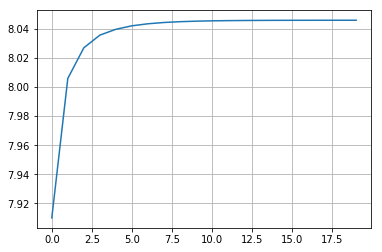

In [7]:
from maximumlikelihood import ExpectationMaximization as EM
theta1, likelihood_log1, fig1, ax1 = EM(theta.copy(), data.copy(), gt1.copy())

### Ground truth 2

iteration:  0
likelihood:  8.6426753215856
params:  [0.45039944 0.13601098 0.34746964 0.06611994 0.11043395 1.36137458]
iteration:  1
likelihood:  10.765529369611052
params:  [0.56336279 0.07168543 0.34746964 0.01748214 0.04050285 1.75811821]
iteration:  2
likelihood:  12.527122795827342
params:  [0.58099373 0.04593928 0.34746964 0.02559735 0.02558128 1.0515376 ]
iteration:  3
likelihood:  14.47923998843127
params:  [0.57629668 0.03171166 0.34746964 0.04452202 0.01740276 1.12667585]
iteration:  4
likelihood:  16.50546274737689
params:  [0.56716026 0.02875284 0.34746964 0.05661726 0.01271706 0.7477079 ]
iteration:  5
likelihood:  18.31106197763992
params:  [0.55942098 0.02020952 0.34746964 0.07289987 0.01009555 0.94112917]
iteration:  6
likelihood:  20.120244846864004
params:  [0.54886275 0.02405653 0.34746964 0.07961108 0.0082119  0.60580942]
iteration:  7
likelihood:  21.645393899749298
params:  [0.54233279 0.01583485 0.34746964 0.09436272 0.00705399 0.89791961]
iteration:  8
likeliho

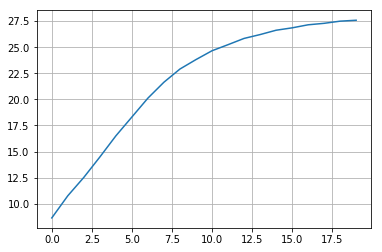

In [8]:
theta2, likelihood_log2, fig2, ax2 = EM(theta.copy(), data.copy(), gt2.copy())

## Model Comparison
We plot both resulting models here for a test ground truth to do a comparison.

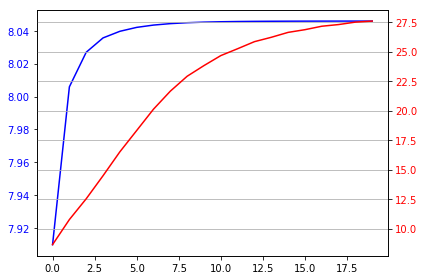

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(likelihood_log1, c='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(likelihood_log2, c='r')
ax2.tick_params(axis='y', labelcolor='r')
fig.tight_layout()
plt.grid()

### Model for ground truth 1

[0.5247179  0.03035531 0.34746964 0.09745715 0.19708422 0.63124529]


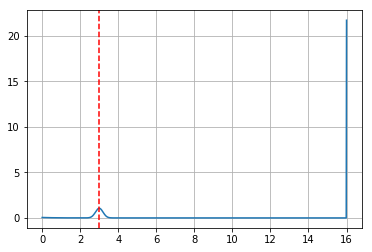

In [14]:
from sensormodel import Likelihood

TEST_GROUND_TRUTH = 3.0

x = np.linspace(0.0, 16.0, 1000)
x_ = np.ones_like(x)*TEST_GROUND_TRUTH

likelihood1 = np.vectorize(Likelihood(theta = theta1).P)
y1 = likelihood1(x, x_)

print(theta1)
plt.plot(x, y1)
plt.axvline(TEST_GROUND_TRUTH, c='r', linestyle='--')
plt.grid()

### Model for ground truth 2

[0.50858697 0.01769387 0.34746964 0.12624952 0.00421572 0.72616816]


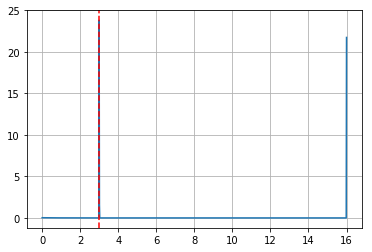

In [15]:
likelihood2 = np.vectorize(Likelihood(theta = theta2).P)
y2 = likelihood2(x, x_)

print(theta2)
plt.plot(x, y2)
plt.axvline(TEST_GROUND_TRUTH, c='r', linestyle='--')
plt.grid()

## Test Model for Correctness
We now sample from the fitted model and plot the histogram so that we can compare with the likelihood to see if our implementation is correct.
### Samples for ground truth 1

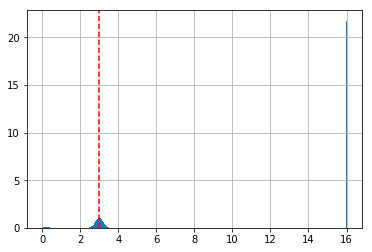

In [16]:
from sensormodel import SampleLIDAR

N_SAMPLES = 10**5
ground_truth = np.ones(N_SAMPLES)*TEST_GROUND_TRUTH

sampler1 = SampleLIDAR(theta1)

samples1 = sampler1.sample(ground_truth)
plt.hist(samples1, bins=1000, density=True);
plt.axvline(TEST_GROUND_TRUTH, c='r', linestyle='--')
plt.grid()

### Samples for ground truth 2

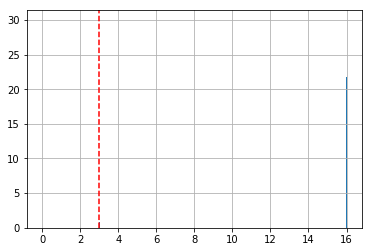

In [21]:
sampler2 = SampleLIDAR(theta2)

samples2 = sampler2.sample(ground_truth)
plt.hist(samples2, bins=1000, density=True);
plt.axvline(TEST_GROUND_TRUTH, c='r', linestyle='--')
plt.grid()

***